In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt


In [3]:
import os
from tensorflow.keras.preprocessing import image

#load images from path and label them
def load_images_from_path(path, label):
    images, labels = [], []
    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224,3))))
        labels.append(label)
    return images, labels
#show sample of 8 images
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks':[], 'yticks':[]})
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i]/255)
 

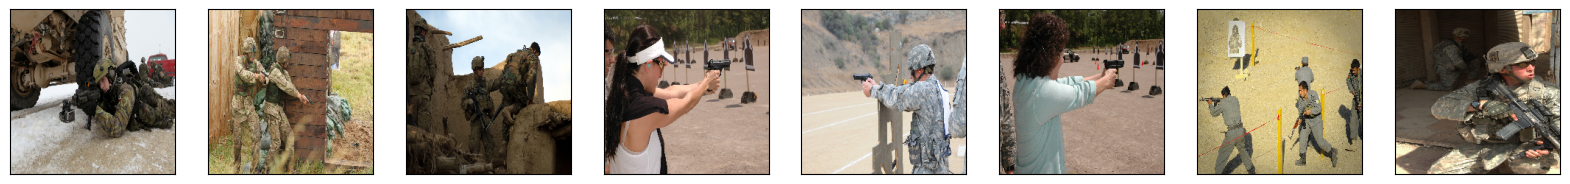

In [4]:
#load shooter images and label them 1
shooter_images, shooter_labels = load_images_from_path('data/shooter', 1)
show_images(shooter_images)

 

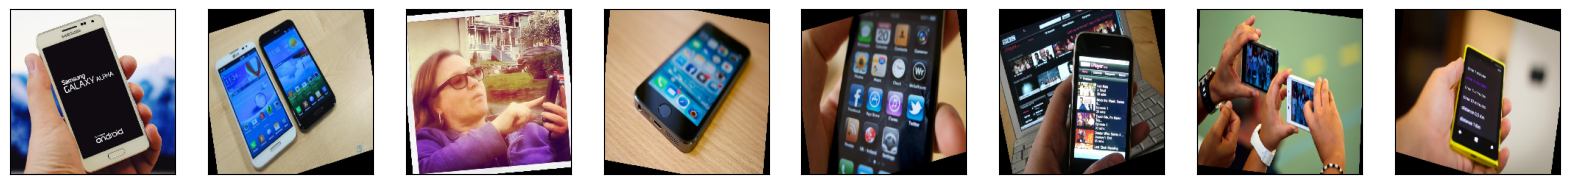

In [5]:
#load cellphone images and label them 0
cellphone_images, cellphone_labels = load_images_from_path('data/cellphone', 0)
show_images(cellphone_images)
 

In [6]:
#combine images and labels
x,y = [],[]
x = cellphone_images + shooter_images
y = cellphone_labels + shooter_labels

In [7]:
#Preprocess images convert to numpy array and normalize images
x = (np.array(x) / 255.0).astype('float32')
y = np.array(y)

In [8]:
from sklearn.model_selection import train_test_split 
#split data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [9]:

from tensorflow.keras.utils import to_categorical
#convert labels to binary classes
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomTranslation

model = Sequential([
    RandomFlip('horizontal'),
    RandomRotation(0.1),
    RandomZoom(0.1),
    RandomTranslation(0.1, 0.1),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 236ms/step - accuracy: 0.7495 - loss: 0.5101 - val_accuracy: 0.9047 - val_loss: 0.3182
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 236ms/step - accuracy: 0.9158 - loss: 0.2251 - val_accuracy: 0.9197 - val_loss: 0.3491
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 236ms/step - accuracy: 0.9372 - loss: 0.1816 - val_accuracy: 0.9682 - val_loss: 0.1146
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 234ms/step - accuracy: 0.9390 - loss: 0.1568 - val_accuracy: 0.9482 - val_loss: 0.1688
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 235ms/step - accuracy: 0.9505 - loss: 0.1453 - val_accuracy: 0.9448 - val_loss: 0.1965
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 232ms/step - accuracy: 0.9482 - loss: 0.1431 - val_accuracy: 0.9783 - val_loss: 0.0982
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 231ms/step - accuracy: 0.9604 - loss: 0.1077 - val_accuracy: 0.9799 - val_loss: 0.0843
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 231ms/step - accuracy: 0.9627 - loss: 0.1182 - val_accu

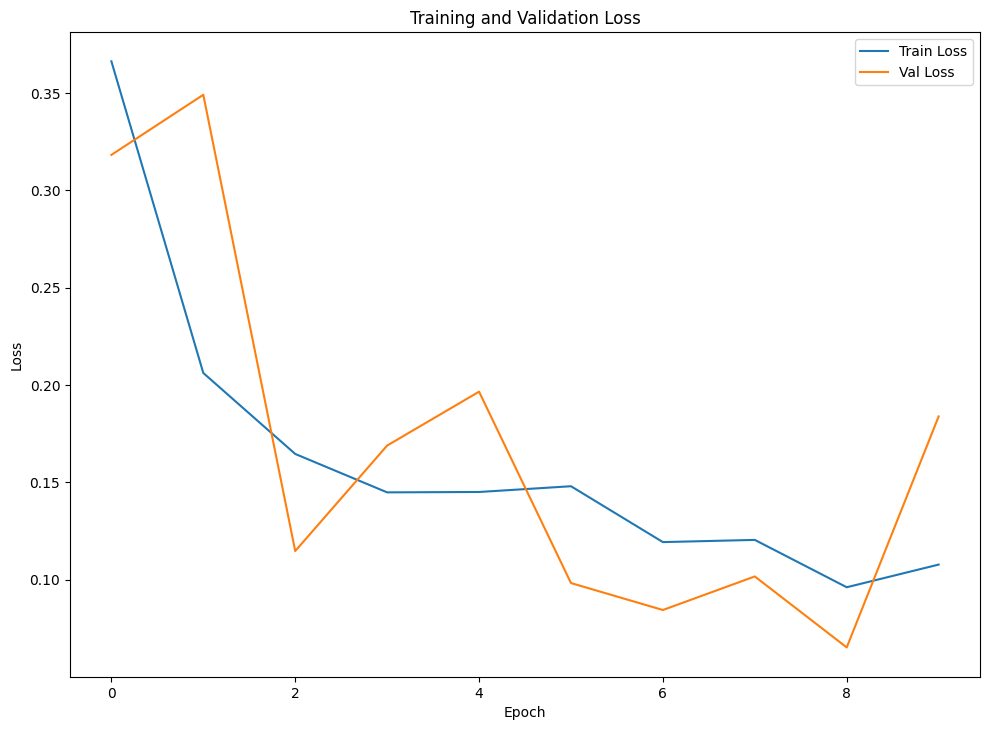

In [12]:
plt.figure(figsize=(10, 14))
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.show()

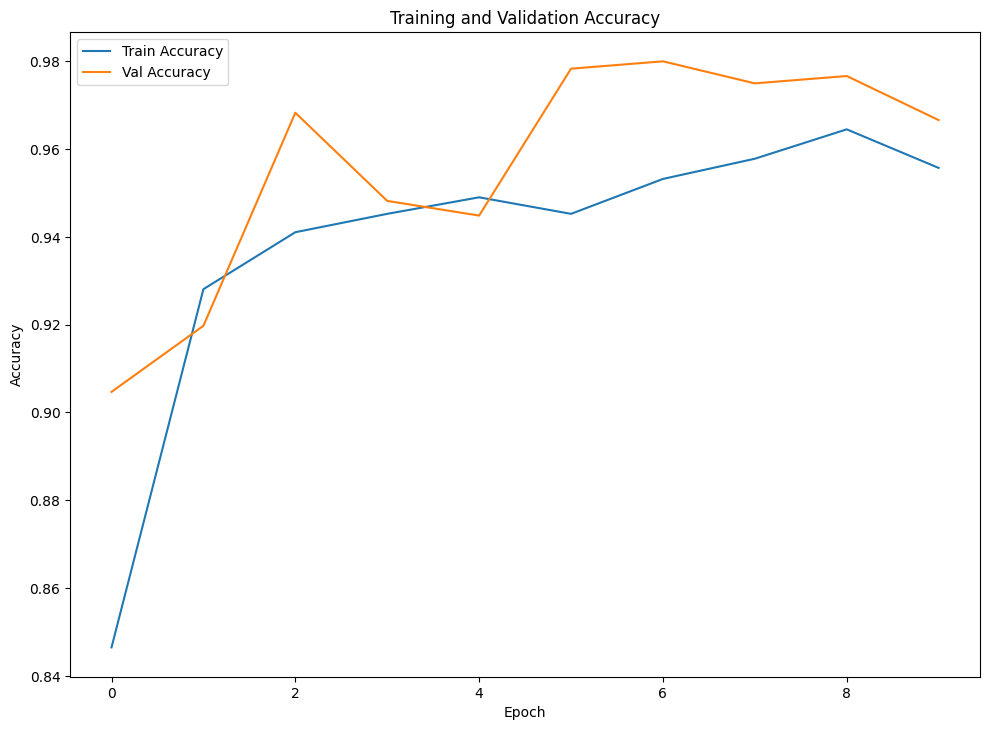

In [13]:
plt.figure(figsize=(10,14))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()

In [14]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9612 - loss: 0.2453
Test Loss: 0.1838
Test Accuracy: 96.66%


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


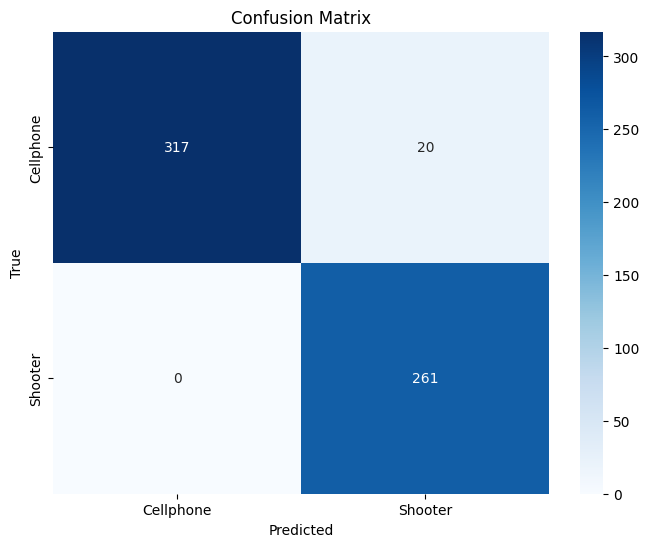

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
class_labels = ['Cellphone', 'Shooter']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
import pickle

pickle.dump(model, open('shooter.pkl', 'wb'))